# Learn Notebook

In [1]:
# Setup env
import datetime, rdflib, pdb, sys, hashlib, requests
import os, sys, rdflib, uuid
from bplustree import BPlusTree, StrSerializer
NOTEBOOK_DIR = os.path.split(os.path.abspath(os.curdir))[0]
PROJECT_DIR = os.path.split(NOTEBOOK_DIR)[0]
BASE_DIR = os.path.split(PROJECT_DIR)[0]
CACHE_DIR = os.path.join(PROJECT_DIR, "cache")
sys.path.append(CACHE_DIR)
import btree
print(datetime.datetime.now(), sys.platform, os.path.os.name, BASE_DIR, PROJECT_DIR)

2018-05-26 18:30:49.396311 linux posix /home/jpnelson/2018 /home/jpnelson/2018/linked-data-fragments


In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
btree_data = [{"date": "2018-05-25T15:40:33.180260",
               "size": 5075210240,
               "triples": 2721170},
              {"date": "2018-05-24T15:48:21.248258",
               "size": 67432448,
               "triples": 28122},
              {"date": "2018-05-25T12:21:50.000",
               "size": 28122,
               "triples": 170
              }]


[5075210240, 67432448, 28122] [2721170, 28122, 170]


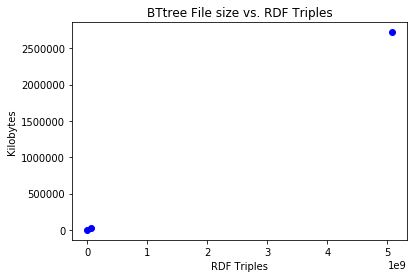

In [23]:
sizes, triples = [],[]
ratio = []
for row in btree_data:
    sizes.append(row.get('size'))
    triples.append(row.get('triples'))
    ratio.append(row.get('triples') / row.get('size'))
print(sizes,triples)
plt.plot( sizes, triples,'bo')
plt.title("BTtree File size vs. RDF Triples")
plt.ylabel("Kilobytes")
plt.xlabel("RDF Triples")
plt.show()

## Discussion
Being very careful to not make too many conclusions (with a sample size of 3!) The current graph line looks like a linear relationship between the number of triples and the size of the file.

From this preliminary testing, we can make some predications about between the number of triples and the size of the resulting file given an arbitary set of RDF triples. Even though btree size 5GB is large for the 2.7 million triples used in the Plains2Peaks DP.LA service hub pilot, we still need to test the performance of different btree files. 

## Odds and Ends

###  When submiting a HTTP GET request to the Linked Data Fragments Server, do not use raw URL
Encoded the raw URL value using `urllib.parse.urlencode` method. 

In [18]:
print(rdflib.RDF.type)
uncoded_url = "http://localhost:7000/?p={}".format(rdflib.RDF.type)
result = requests.get(uncoded_url)
print(uncoded_url, result.status_code)
print(result.json().get("metadata"))
import urllib.parse
print("http://localhost:7000/{}".format(urllib.parse.urlencode({"p": str(rdflib.RDF.type)})))

http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://localhost:7000/?p=http://www.w3.org/1999/02/22-rdf-syntax-ns#type 200
{'subject': 'http://localhost:7000/4779d612-605d-11e8-a669-001fc69cf6df', 'predicate': 'void:triples', 'object': 0}
http://localhost:7000/p=http%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23type


In [13]:
result = requests.get("http://localhost:7000/?p=http%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23type")
print(result.json().get("metadata"))

{'subject': 'http://localhost:7000/a8fa9100-605c-11e8-81ee-001fc69cf6df', 'predicate': 'void:triples', 'object': 52}


So what I think is happening is that Falcon is stripping off characters the final **#** in the url when the unencoded URL is being used. 